# **Métodos Avanzados en Estadística**

## Regresión

*Autor: Daniel Beteta Francisco*

In [3]:
install.packages("tidyverse")
install.packages("leaps")
install.packages("glmnet")

library(tidyverse)
library(leaps)
library(glmnet)

SEED <- 123
set.seed(SEED)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Ejercicio 1**

**El siguiente código carga los datos del fichero natalidad con información de algunas variables socioeconómicas de un conjunto de países:**

In [4]:
natality <- read.table("natalidad.txt", header = TRUE) %>% 
              mutate(log_pnb = log(pnb))

head(natality)

,nat,mort,mortinf,esph,espm,pnb,log_pnb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,24.7,5.7,30.8,69.6,75.5,600,6.396930
2,12.5,11.9,14.4,68.3,74.7,2250,7.718685
3,13.4,11.7,11.3,71.8,77.7,2980,7.999679
4,11.6,13.4,14.8,65.4,73.8,2780,7.930206
5,14.3,10.2,16.0,67.2,75.7,1690,7.432484
6,13.6,10.7,26.9,66.5,72.4,1640,7.402452


**Se desea estudiar la esperanza de vida de los hombres como función lineal de la tasa de natalidad, la tasa de mortalidad infantil y el logaritmo del producto nacional bruto. Para ello se ajusta un modelo de regresión lineal múltiple, con los resultados siguientes:**

In [5]:
reg <- lm(esph ~ nat  + mortinf + log_pnb, data=natality)
summary(reg)


Call:
lm(formula = esph ~ nat + mortinf + log_pnb, data = natality)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4893 -2.1660  0.1581  2.0663  7.9084 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 65.95088    3.25642  20.253  < 2e-16 ***
nat         -0.14621    0.04762  -3.071  0.00285 ** 
mortinf     -0.13312    0.01537  -8.663  2.2e-13 ***
log_pnb      0.94478    0.32989   2.864  0.00524 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.128 on 87 degrees of freedom
Multiple R-squared:    0.9,	Adjusted R-squared:  0.8966 
F-statistic: 261.1 on 3 and 87 DF,  p-value: < 2.2e-16


**1. ¿De cuántos países consta la muestra utilizada?**

In [6]:
nrow(natality)

[1] 91

La cantidad de países de la muestra es igual a la cantidad de filas de dicha muesta, esto es, 91 países.

**2. ¿Cuánto vale la suma de cuadrados que se utiliza para medir la variabilidad explicada por las tres variables regresoras?**

Ya que se sabe que $ R^2 = \frac{SCE}{SCT}$ y que $SCT = SCE + SCR$, se despeja $SCE$ (la suma de cuadrados que se usa para medir la variabilidad explicada de las variables regresoras), dando como resultado: 

$SCE = \frac{R^2 SCR}{1 - R^2} = \frac{0.9 * 3.128}{1 - 0.9} = 28.152$.

**3. ¿Cuánto vale la varianza muestral de la variable respuesta $\sum_{i=1}^{n} (Y_i - \bar{Y})^2 / (n-1)$?**

Ya que se sabe por un lado que $SCT = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 = SCE + SCR = 28.152 + 3.128 = 31.28$.

Y por otro lado, $n = 91$.

La varianza muestral de la variable respuesta será $\frac{31.28}{91 -1} = 0.3475$.

**4. Contrasta a nivel $\alpha = 0.05$ la hipótesis nula $H_0 : \beta_1 = 0$.**

La variable asociada a $\beta_1$ es la tasa de natalidad, y su respectivo p-valor es $0.00285$ luego como esta cifra es menor al $\alpha = 0.05$, se rechaza la hipotésis nula, y por tanto se mantiene dicha variable debido a su nivel de significación para el modelo.

**5. Contrasta a nivel $\alpha = 0.05$ la hipótesis nula $H_0 : \beta_1 = \beta_2 = \beta_3 = 0$.**

De forma paralela al apartado anterior, ahora se pide realizar un contraste de hipótesis para todas las variables no nulas del modelo, es decir, se busca comprobar la validez del modelo en su conjunto. De tal forma, como su p-valor es $2.2e-16$ y este es menor al $\alpha = 0.05$ se rechaza la hipótesis nula, luego se acepta el modelo planteado. 

**6. Estima la covarianza entre $\hat{\beta_1}$ y $\hat{\beta_2}$.**

In [7]:
vcov(lm(esph ~ nat + mortinf - 1, data=natality))

,nat,mortinf
nat,0.05970861,-0.02498382
mortinf,-0.02498382,0.01215220


**7. Calcula intervalos de confianza al nivel 90% para todos los $\beta_i$ del modelo.**

*Natalidad*

In [8]:
confint(object=reg, parm="nat", level=0.90)

,5 %,95 %
nat,-0.2253786,-0.06704702


*Mortalidad infantil*

In [9]:
confint(object=reg, parm="mortinf", level=0.90)

,5 %,95 %
mortinf,-0.1586652,-0.1075685


*Logaritmo del Producto Nacional Bruto*

In [10]:
confint(object=reg, parm="log_pnb", level=0.90)

,5 %,95 %
log_pnb,0.3963072,1.493246


**8. Predice el valor de la esperanza de vida de los hombres en un país para el que el índice de natalidad es 29, la mortalidad infantil vale 50 y el logaritmo de su pnb vale 7.Calcula un intervalo de confianza del 95 % para el valor esperado de dicha variable.**

In [11]:
new.data <- data.frame(nat=29, mortinf=50, log_pnb=7)
predict(reg, new.data, interval='prediction', level=0.95)

,fit,lwr,upr
1,61.6683,55.40147,67.93514


# **Ejercicio 2**

**Genera aleatoriamente una variable regresora $X$ y un vector aleatorio $\epsilon$ de longitud $n=100$, con distribución normal estándar e independientes. Genera la variable respuesta de acuerdo con el modelo:**

$Y = X + X^2 + X^3 + \epsilon$

In [12]:
n <- 100
X <- rnorm(n)
epsilon <- rnorm(n, sd=1)

In [13]:
Y <- X + X**2 + X**3 + epsilon

**1. Selecciona el modelo óptimo entre todos los submodelos que contienen como variables regresoras $X, X^2, X^3, ...,X^{10}$. ¿Cuál es el mejor modelo de acuerdo con los criterios $C_p, BIC$ y $R^2_a$.**

In [14]:
df <- data.frame(y=Y, x1=X, x2=X**2, x3=X**3, x4=X**4, 
                 x5=X**5, x6=X**6, x7=X**7, x8=X**8, 
                 x9=X**9, x10=X**10)

k_variables_models <- leaps::regsubsets(y ~ ., data=df, nvmax=n)
summary_models <- summary(k_variables_models)

summary_models$outmat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1 ( 1 ),,,*,,,,,,,
2 ( 1 ),,*,*,,,,,,,
3 ( 1 ),*,*,*,,,,,,,
4 ( 1 ),*,*,*,,,*,,,,
5 ( 1 ),*,*,*,,,,*,,*,
6 ( 1 ),*,*,*,*,,*,,*,,
7 ( 1 ),*,*,*,*,,*,,*,,*
8 ( 1 ),*,*,,*,*,*,*,*,,*
9 ( 1 ),*,*,*,*,*,*,*,*,,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


Se ha seguido el método exhaustivo para generar el mejor modelo de regresión para un tamaño $k$ de variables regresoras. Así, se va eligiendo el modelo que máximize $R^2$, independientemente de las variables regresoras escogidas en $k-1$. Un ejemplo de ello se tiene en $k=4$ frente $k=5$ donde en el primero se escoge $x6$ pero en el segundo se añade $x7$ y $x9$, dejandose fuera $x6$.

Sin embargo, para seleccionar el mejor modelo de entre los que tienen diferente cantidad de variables, no se puede utilizar el coeficiente de determinación, ya que la suma de cuadrados residuales siempre disminuye al aumentar el número de variables. Es por ello que ahora procedemos a comparar los resultados con las siguientes métricas:

*Criterio de Mallows*

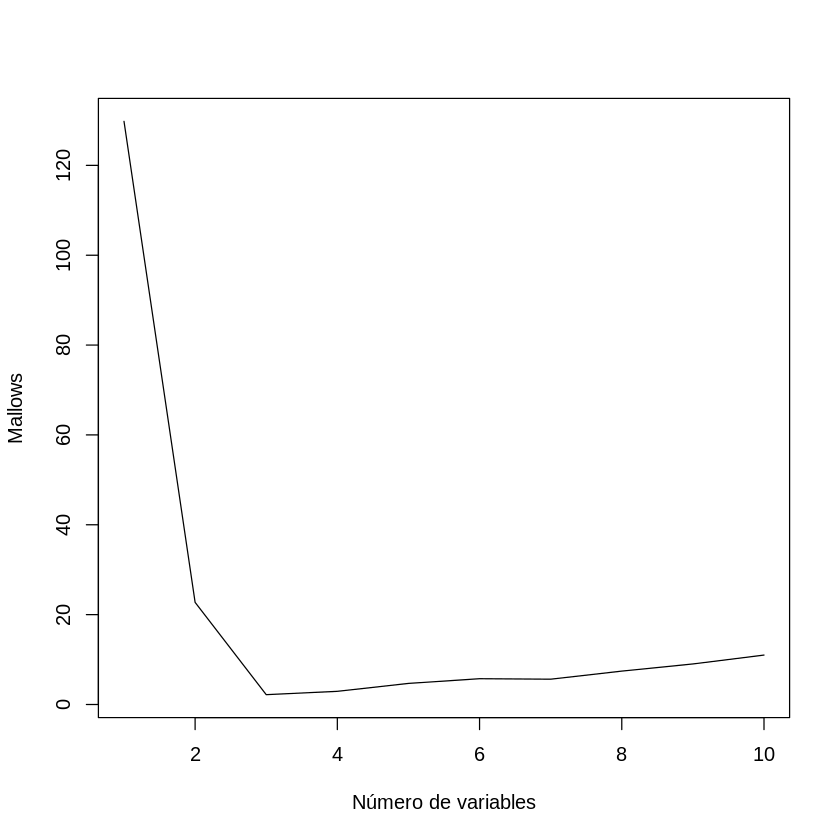

In [15]:
plot(summary_models$cp ,xlab ="Número de variables", ylab="Mallows",type="l")

*Criterio de información bayesiano*

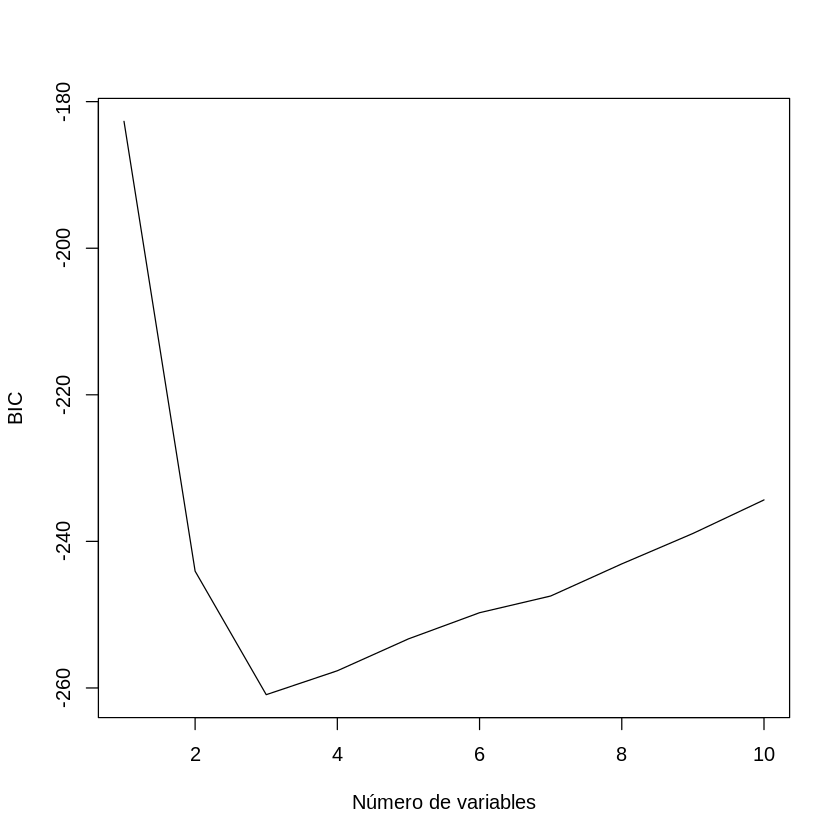

In [16]:
plot(summary_models$bic ,xlab ="Número de variables", ylab="BIC",type="l")

*Coeficiente de determinación ajustado*

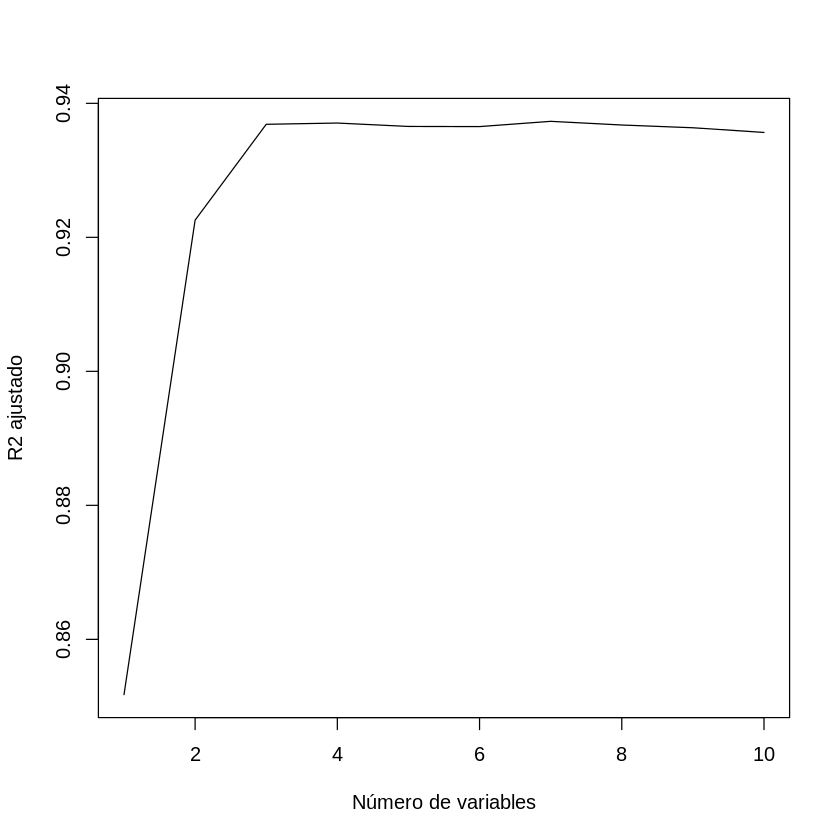

In [17]:
plot(summary_models$adjr2, xlab="Número de variables", ylab="R2 ajustado", type="l")

Luego se ve que los 3 criterios seleccionan al modelo de tres variables regresoras.

Nótese que en el único criterio que se busca maximizar es en el del coeficiente de determinación ajustado.

**2. Repite el apartado anterior usando el método iterativo hacia adelante.**

In [18]:
k_variables_models_forward <- regsubsets(y ~ ., data=df, nvmax=n, method='forward')
summary_models_forward <- summary(k_variables_models_forward)

summary_models_forward$outmat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1 ( 1 ),,,*,,,,,,,
2 ( 1 ),,*,*,,,,,,,
3 ( 1 ),*,*,*,,,,,,,
4 ( 1 ),*,*,*,,,*,,,,
5 ( 1 ),*,*,*,,,*,,,*,
6 ( 1 ),*,*,*,,*,*,,,*,
7 ( 1 ),*,*,*,,*,*,,,*,*
8 ( 1 ),*,*,*,*,*,*,,,*,*
9 ( 1 ),*,*,*,*,*,*,,*,*,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


En el método iterativo hacia adelante la estrategia que se sigue es la de añadir al presente modelo de $k$ variables, la varible regresora de entre las restantes que mayor valor de $R^2$ devuelva.

*Criterio de Mallows*

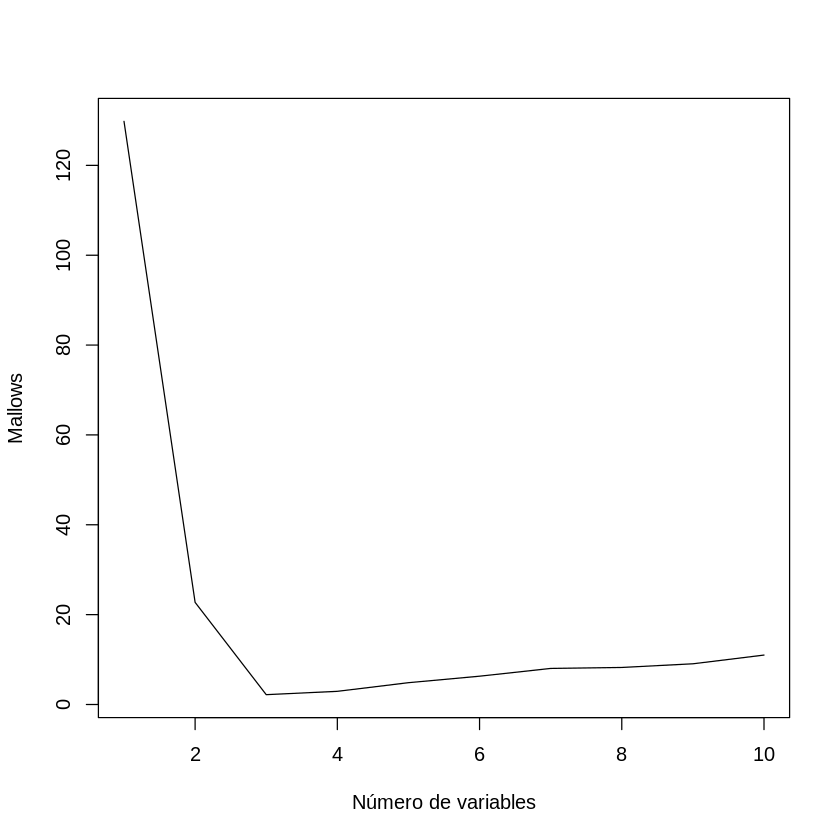

In [19]:
plot(summary_models_forward$cp ,xlab ="Número de variables", ylab="Mallows",type="l")

*Criterio de información bayesiano*

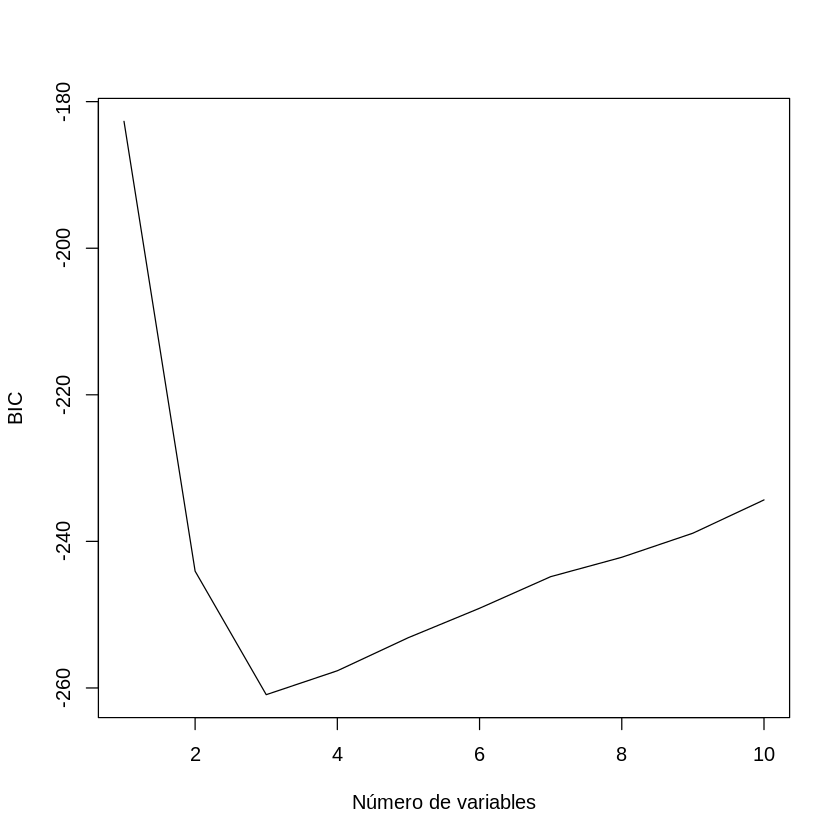

In [20]:
plot(summary_models_forward$bic ,xlab ="Número de variables", ylab="BIC",type="l")

*Coeficiente de determinación ajustado*

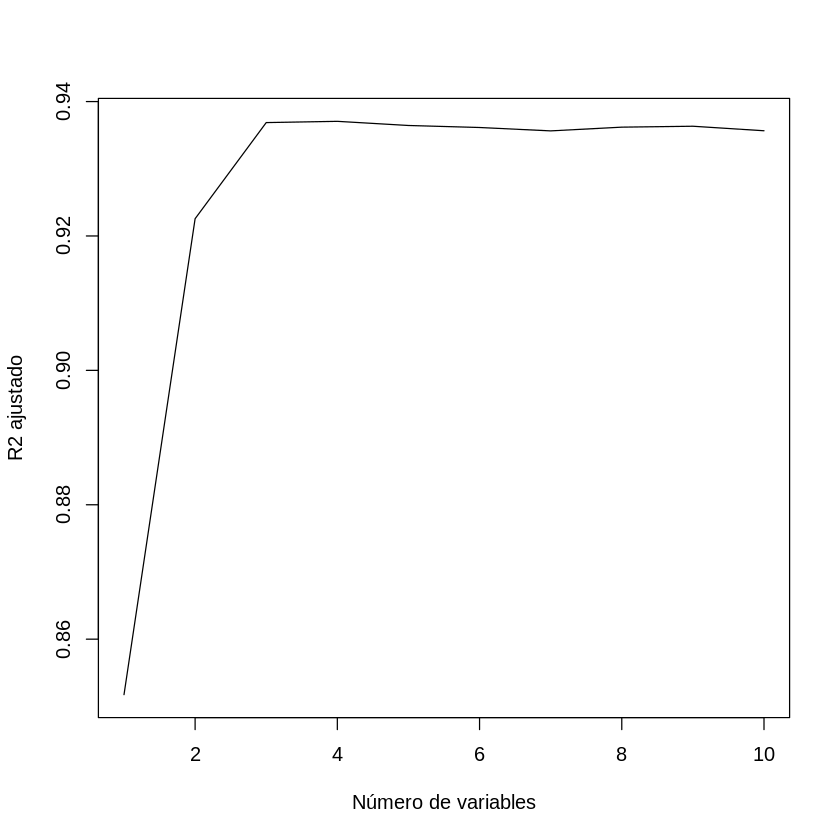

In [21]:
plot(summary_models_forward$adjr2 ,xlab="Número de variables", ylab="R2 ajustado", type="l")

De igual forma que antes, ahora los tres criterios también seleccionan como óptimo el modelo de 3 variables regresoras, siendo además estas, las mismas que con el método exhaustivo: $Y = X + X^2 + X^3$.

**3. Aplica ahora lasso al modelo que incluye las variables regresoras $X, X^2, ...,X^{10}$. Selecciona el parámetro de regularización mediante validación cruzada y compara los resultados del ajuste con los de los apartados anteriores.**

In [22]:
x <- as.matrix(df[, -1])
y <- df[, 1]

cv_lasso <- cv.glmnet(x, y, alpha=1) # alpha = 1 (lasso)
lambda_value <- cv_lasso$lambda.1se
cat("Valor del parámetro de regularización: ", lambda_value)

lasso_model <- glmnet(x, y, alpha=1, lambda=lambda_value)
coef(lasso_model)

Valor del parámetro de regularización:  0.2892953

11 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 0.19366572
x1          0.76451333
x2          0.63233422
x3          0.97385911
x4          0.01680604
x5          .         
x6          .         
x7          .         
x8          .         
x9          .         
x10         .         

Al usar como método de regularización Lasso, se puede observar como dicho método queda entre medias de mínimos cuadrados y componentes principales, ya que aunque aparecen 4 variables seleccionadas, la cuarta (la que se sabe que realmente no forma parte del modelo) tiene un coeficiente significativamente más bajo al resto.

Por tanto, el modelo generado por dicha técnica es prácticamente el mismo al alcanzado en los apartados anteriores.

**4. Genera ahora las respuestas a partir del modelo**

$Y = X^7 + \epsilon$

**y aplica de nuevo el método lasso. Describe los resultados obtenidos.**

In [23]:
x <- as.matrix(df[, -1])
y_new <- X**7 + epsilon

cv_lasso <- cv.glmnet(x, y_new, alpha=1) 
lambda_value <- cv_lasso$lambda.1se
cat("Valor del parámetro de regularización: ", lambda_value)

lasso_model <- glmnet(x, y, alpha=1, lambda=lambda_value)
coef(lasso_model)

Valor del parámetro de regularización:  1.52858

11 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 0.87411181
x1          0.07044625
x2          .         
x3          0.76075114
x4          .         
x5          .         
x6          .         
x7          .         
x8          .         
x9          .         
x10         .         

En este caso, no se consigue ajustar el modelo que se busca, ya que se seleccionan las variables regresoras $x1$ y $x3$, además del término independiente.

# **Ejercicio 3**

**Genera dos conjuntos de 100 datos que sigan el modelo de regresión**

$Y = x^2\sin(x) + \sigma\epsilon, x \in [-\pi, \pi], \epsilon ≡ N(0, 1),$

**para $\sigma = 0.5$ y para $\sigma = 1$, respectivamente.**

In [24]:
n <- 100
epsilon <- rnorm(n, sd=1)
x <- seq(-pi, pi, length.out=n)

fun_reg <- function(x){
  x^2 * sin(x)
}

**1. Representa gráficamente (por separado) los dos conjuntos de datos.**

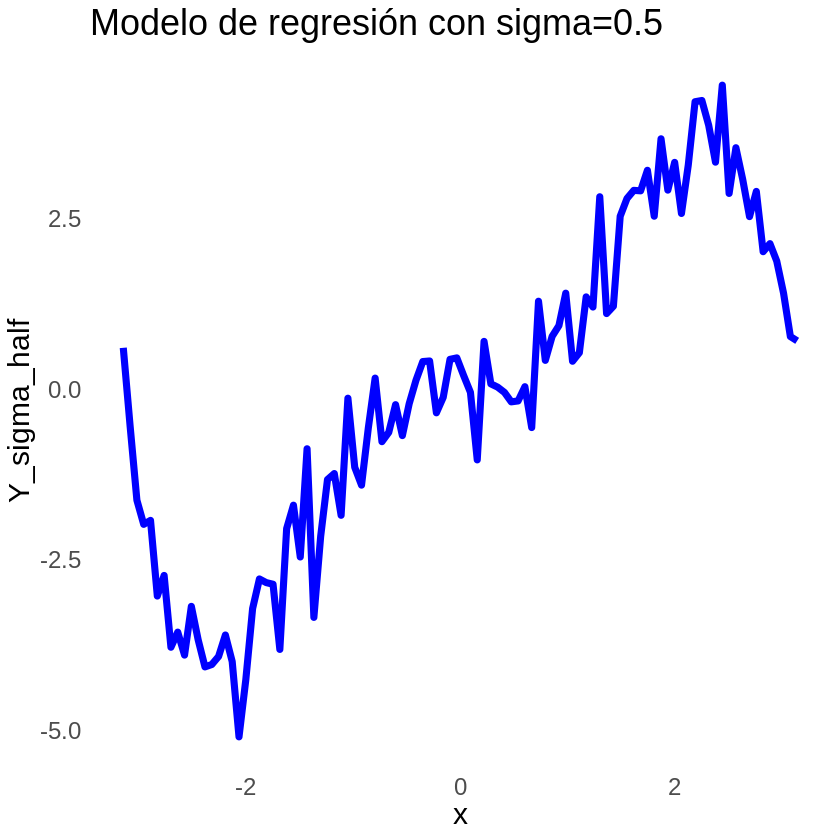

In [25]:
sigma_value <- 0.5

Y_sigma_half <- fun_reg(x) + sigma_value * epsilon

ggplot() +
  geom_line(aes(x, Y_sigma_half), col="blue", linewidth=2) +
  labs(title="Modelo de regresión con sigma=0.5") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

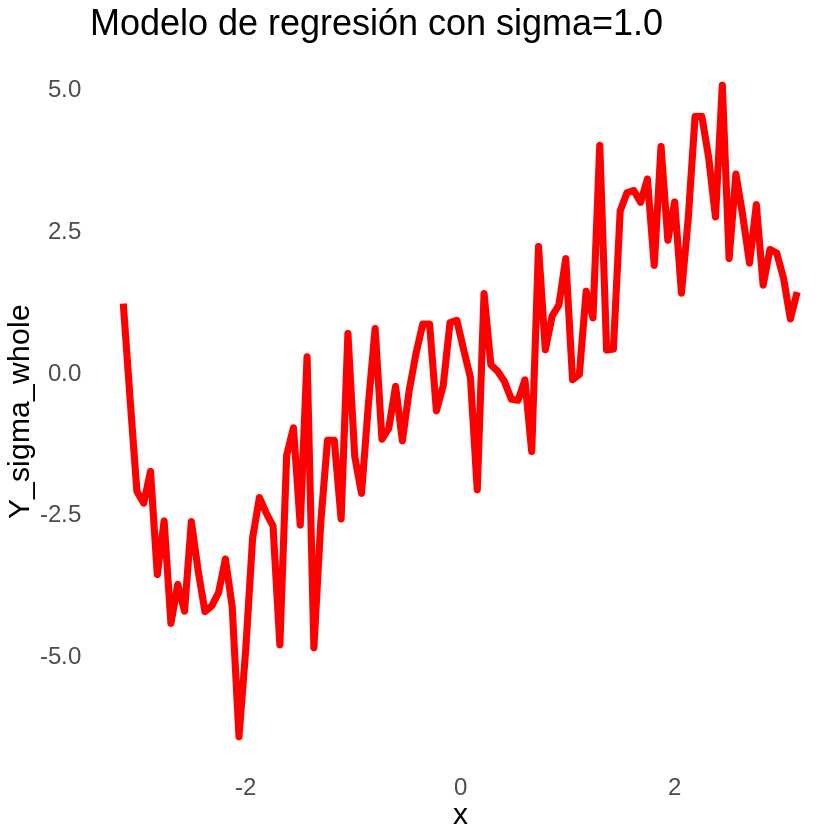

In [26]:
sigma_value <- 1

Y_sigma_whole <- fun_reg(x) + sigma_value * epsilon

ggplot() +
  geom_line(aes(x, Y_sigma_whole), col="red", linewidth=2) +
  labs(title="Modelo de regresión con sigma=1.0") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

**2. Para cada conjunto de datos ajusta una regresión de mínimos cuadrados penalizada prefijando unos grados de libertad efectivos 3, ... , 25. Representa gráficamente el error de predicción de validación cruzada generalizado en función de los grados de libertad utilizados. Comenta los
resultados obtenidos.**

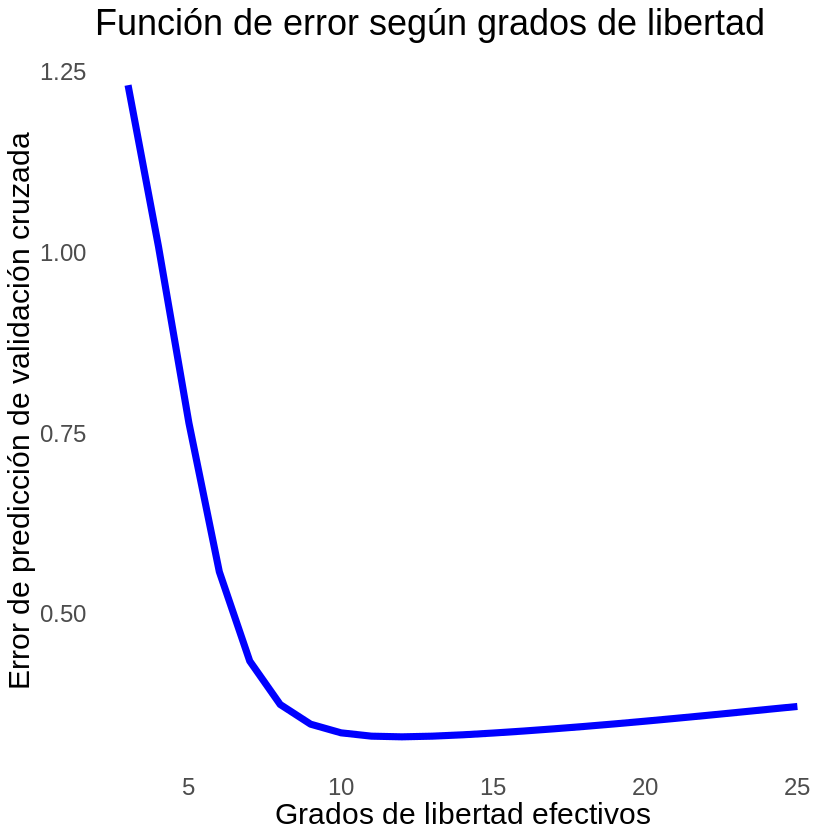

In [27]:
list_of_degrees_of_freedom <- c(3:25)
list_of_vc_errors <- c()

for (degrees_of_freedom in list_of_degrees_of_freedom){
  splines <- smooth.spline(x, Y_sigma_half, df=degrees_of_freedom)   
  list_of_vc_errors <- c(list_of_vc_errors, splines$cv.crit)
}

df <- data.frame(x=list_of_degrees_of_freedom, y=list_of_vc_errors)

ggplot(df) +
  geom_line(aes(x=x, y=y), col="blue", linewidth=2) +
  labs(x="Grados de libertad efectivos", y="Error de predicción de validación cruzada", title="Función de error según grados de libertad") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

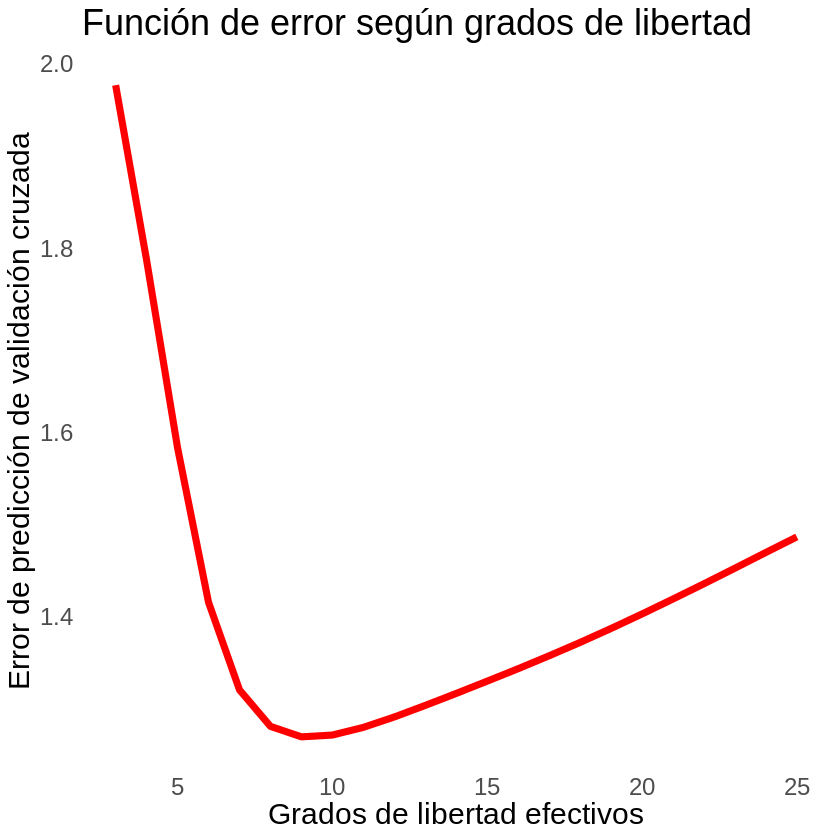

In [28]:
list_of_degrees_of_freedom <- c(3:25)
list_of_vc_errors <- c()

for (degrees_of_freedom in list_of_degrees_of_freedom){
  splines <- smooth.spline(x, Y_sigma_whole, df=degrees_of_freedom)   
  list_of_vc_errors <- c(list_of_vc_errors, splines$cv.crit)
}

df <- data.frame(x=list_of_degrees_of_freedom, y=list_of_vc_errors)

ggplot(df) +
  geom_line(aes(x=x, y=y), col="red", linewidth=2) +
  labs(x="Grados de libertad efectivos", y="Error de predicción de validación cruzada", title="Función de error según grados de libertad") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

Aunque en ambas representaciones gráficas se ve como hay un grado de libertad que minimiza el error de predicción, se puede observar que para el modelo de regresión de $\sigma=1.0$, el papel del grado de libertad efectivo es más relevante, ya que sube signficativamente el error si el valor no está dentro del subconjunto adecuado.

Esto cobra además todavía más significado si comparamos el rango de valores de error del primer modelo $≈ [0.25, 1.25]$ y del segundo modelo $≈ [1.2, 2.0]$.